# 决策树-I    泰坦尼克号幸存者预测

用泰坦尼克号的数据做这个决策树实验。遵循通用结构来完成一个简单的决策树模型，使用分类特征categorical features。

本笔记的结构如下：

1、输入库

2、取得训练数据和测试数据

3、分析、识别模式，探寻数据

4、数据准备，清洗数据

5、建模、预测和评价

6、可视化、报告，提供解决问题的步骤，和最后的解决方法。



## 1、导入库

需要数据清理、分析、训练机器学习模型、可视化和评价等库。

In [1]:
# data analysis and preparing
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

## 2、获得数据

首先将获得的泰坦尼克号乘客和幸存者的数据（两个文件）导入到Pandas数据表。（后面实际只用到了train_df的数据。）

实际主要分析的数据是在第一个train.csv文件中，test文件中没有幸存者一列的数据，所以不能用于学习和训练。

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## 3、分析、识别模式，探寻数据

首先查看一下数据的表头。（如果表头格式不对，主要是因为原数据没有表头，则需要回到上一步，用header=None的方式读取数据文件。）

In [3]:
print(train_df.columns.values.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


数据表头的解释：
- PassengerID标识旅客的序号，
- Survived标识是否幸存，
- Pclass是仓位等级（1/2/3），
- SibSp是指同船的兄弟姐妹配偶等数量，
- Parch是指与父母孩子同船的数量，
- Ticket是船票编号，
- Fare是船票价格，
- Cabin是客舱编号，
- Embarked是登船地点

下面查看一下数据的结构（只显示前面5行数据）

In [4]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


下一步，识别特征类型。这些信息用于后面的机器学习算法ML algorithms和可视化准备数据。

两种特征类型,

1. 分类特征 Categorical features  - contain a finite number of categories or distinct groups.有限的分类或者分组。

2. 连续特征 Continuous features - numeric variables that have an infinite number of values between any two values.有限大小的数值。

如果数据是离散的（2个数值之间的有限数量的数值），可以看做连续特征或者分类特征。

分析导入的数据，一共三类：

- 分类特征：Survived、sex、embarked、ticket、cabin、plass

- 连续特征：age、fare

- 离散特征：SibSp、Parch


### 识别丢失的数据

查看丢失的数据
 

In [5]:
train_df.info()
print('#'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

age、cabin丢失数据较多。embarked丢失只有2个，Fare数据丢失1个。

cabin只有91个非空数据，丢失过多，认为会对预测负面影响，删除这一特征列。

In [6]:
for df in combine:
    df.drop('Cabin', axis=1, inplace=True)
    

## 数据分析Data analysis

下面分别对连续数值的数据和分类特征的数据进行汇总描述。

先看看连续值的数据的汇总描述：

提示——此处虽然有一些属于分类特征，但是因为存储的是整数值，所以在数据描述的时候给出的是数值描述。

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从上面表格信息，大概得出：
- 幸存者是分类特征，1或0。
- 大概38%的例子幸存。
- Parch项，大多数乘客（>75%）是没有跟父母或孩子同船的。
- Pclass也是分类特征而不是连续值，50%以上是3等仓

下面再查看的更细一些：

In [8]:
train_df.describe(percentiles=[.1, .2,.3,.4, .6, .7, .8, .9, .95, .98,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


- sibsp列表示有兄弟姐妹或配偶同行，这里能看出，大概30%的乘客是有兄弟姐妹或配偶同行。
- Parch列，父母孩子同船，有大概20%同船，其中绝大多数都是1/2个孩子。
- Fare是连续值。Fare的价格，普遍的价格不高，只有少数乘客是高价票。
- Age是连续值。少数是高龄乘客，65-80年龄的乘客 < 2%

下面查看一下分类特征的数据：

In [9]:
# Only categorical features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",male,CA. 2343,S
freq,1,577,7,644


- 名字都是唯一的。性别2类，
- 男性male占多数577/891。
- 从哪里登船Embarked有3个值，最多的是S 644个。
- 票信息Ticket，有210（891-唯一681）个票号不唯一，说明是重复票号，22%，也就是类似套票占不少比例。


#### 数据相关性分析

需要了解每个特征值跟Survival的关系，以便了解决定哪些特征可以用于后面的预测模型。
如果在单独的分类任务中有比较好的相关，就认为这个特征比较大可能有用。

本次实验是categorical features分类特征。下面进行相互的相关性分析，针对某个特征和Survived特征分别分析。（分析没有丢失值的特征列。）
Since we are using categorical features today, we can analyze our feature correlations by pivoting them against each 
other. But we can do it only for features with no missing values.

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


上面4个参数，sex、pclass能看出有相关的趋势。但是从sibsp和parch排序看，不是按一个趋势相关，而是随parch和sibsp增加，幸存值有高有低。


### 可视化数据

可视化相关性。用matplotlib和seaborn库。
matplotlib : https://matplotlib.org/3.3.1/contents.html
Seaborn: https://seaborn.pydata.org/tutorial.html

先用seaborn画sibsp和survived的相关图。

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

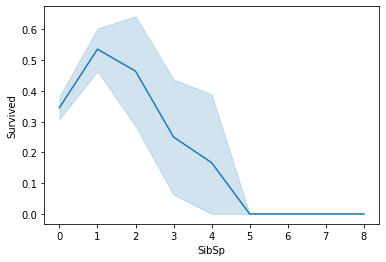

In [14]:
sns.lineplot(x='SibSp', y='Survived', data=train_df)

上图，蓝色线段表示幸存者的评价。浅蓝色区域表示的是置信区间。


下面用seaborn中的FacetGrid api创建格点图。 例如对Pclass、Survived和Sex特征绘制格点图。

d:\program files\python\python38\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\program files\python\python38\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


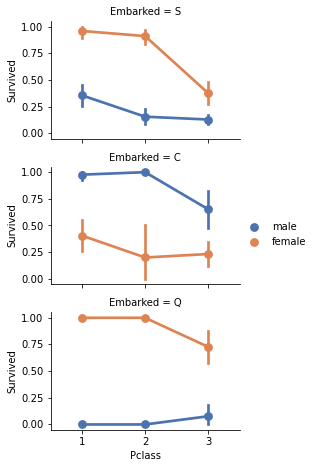

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

通过观察得出一些结论：
- 女性乘客的幸存率高于男性。
- 但除了Embarked=c的乘客，从C港口上船的男性幸存率高。这可能因为仓位pclass跟登船港口Embarked之间存在关系。
- 登船港口对于pclass=3和男性旅客之中有变化的生存率。Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.
- SibSp兄弟姐妹和配偶这个特征值可能对于预测不是太有用。


下面分析Age年龄特征。通过柱状图反映不同年龄幸存与否的数量。

d:\program files\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\program files\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


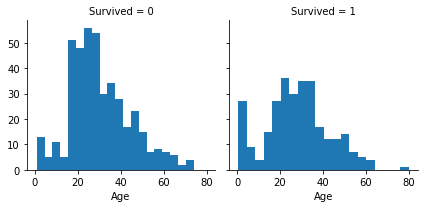

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

观察年龄和生存率：
- 婴儿（年龄<=4）有比较高幸存率
- 最老的人（年龄=80）幸存
- 大量年龄15-25的人未幸存。
- 大部分旅客的年龄在15-35。
数据说明年龄跟幸存的相关性比较高。


## 4、数据准备，清洗数据

基于基本的数据分析，Embarked和年龄特征等是比较有用的特征，予以保留。

另外，Ticket特征有比较高的重复率（有一部分属于套票），但可能与幸存率无关，对预测可能是负面的影响。

PessengerID这一列也需要删除不用。


对于Embarked丢失的数据，可以采用主要特征值进行填充。


In [17]:
# dropping 'Ticket' and 'PassengerID' and completing 'Embarked' by replacing NaN with the mode.
for df in combine:
    df.drop(columns=['Ticket', 'PassengerId'], inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode(dropna=True)[0], inplace=True)
    
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## 数据准备 Data Preparation

数据准备是机器学习过程中的一个关键步骤。一些算法并不能理解数据本身，或不兼容一些数据类型。比如，我们使用的决策树分类不能识别字符串标签。所以我们需要用一种编码来把分类信息转换成数字信息。

这里使用最基本的编码方法，数字编码。方法比较简单：
- 给每个分类分配一个指定的数字。
- 用replace方法实现上面的数字转换。
- 具体做法，先定义转换图，然后进行替换。


In [18]:
num_encode = {
    'Sex': {'male': 0, "female": 1},
    'Embarked': {'S': 0, 'Q': 1, 'C': 2 }
}

我们用pandas数据表中的replace方法，用数字替换标签。

In [19]:
for df in combine:
    df.replace(num_encode, inplace=True)

在模型化数据集之前，需要把测试数据分割，一部分用于训练，一部分用于验证。这有利于在训练过程中更准确的评价数据。
在决定最后采用的模型之后，再使用test数据去测量模型的表现。这个方法帮助我们减少过拟合。


首先把所有特征挪到一个数据表中，目标给到另一个数据表，保留index。这里做的决策树预测模型，所以只选择分类特征的值。另外，兄弟姐妹和配偶的数量SibSp、与父母同行人员数量Parch，这两个作为分类特征使用。


In [20]:
X = train_df[['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']]
y = train_df['Survived']

现在，X变量是属性集，y变量存储相关性的标签。

sklearn的模型选择库中包括有 train_test_split 方法。我们用这个方法随机切分数据成两部分，分别用于训练和验证。

参数 test_size 指定切分的比例。下面的切分，指定的是30%数据用于验证，70%数据用于训练。




In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 5、建模、预测和评价

下面用测试数据训练决策树算法，然后进行预测。所导入的sklearn模块包括相关树的算法，包括一些内置的类/方法用于不同的决策树算法。

因为此案例是采用分类任务，所以使用的是DecisionTreeClassiffier类。



In [22]:
tree = DecisionTreeClassifier(criterion='entropy')

我们使用entropy（熵）作为拆分标准。有多个其他参数可选，下面链接供参考，可以修改此标准参数进行试验。

 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

用类方法fit训练算法。测试数据作为参数传递给fit方法。


In [23]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

然后，对剩下30%的测试数据进行预测。预测采用predict方法。



In [24]:
y_pred = tree.predict(x_test)

检查模型预测的准确率


In [25]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.832089552238806


## 后续任务，对band数据进行预测，见单独band任务的notebook。

For this week you have to manipulate the dataset given and create a notebook like this.

Please download the 'task_dataset.zip' file from the moodle. It contains two files, bands.data and bands.names.
- First read the bands.names. It has an introduction to bands dataset and useful information on the attributes and missing 
values.  
- Open the bands.data and understand the filetype. Try to figure out what are the symbols used to encode missing values.

Make sure your notebook has following things covered.
- Cleaning
- Analyzing
- Visualizing
- Preparing
- Modelling and predicting

Your notebook should have a good structure and everything should be presented nicely.